# **Algoritma Prediksi Coronary Heart Disease (CHD) dalam 10 tahun kedepan**

Algoritma ini diusulkan dalam rangka memenuhi kebutuhan tugas Kerja Praktek di PT OMRON Healthcare Indonesia

Oleh: Athaya Syaqra (18318021) dan Fadhila Ramadiastri (18318006)

Dataset : framingham.csv

Sumber: https://biolincc.nhlbi.nih.gov/teaching/

Dataset ini berisi tiga pemeriksaan klinik dan data tindak lanjut 20 tahun pada sebagian besar peserta kohort Framingham asli. Dokumentasi untuk kumpulan data Framingham berisi daftar variabel dan bantuan pengkodean untuk data tersebut.

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# **Preparing Dataset**

## **Import Dataset**

In [ ]:
# Import Dataset
import pandas as pd
heart_df = pd.read_csv("framingham.csv")

In [ ]:
# Mengubah data dalam bentuk dataframe pandas
df = pd.DataFrame(heart_df)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## **Pre-processing data**

In [ ]:
# Mencari data kosong pada setiap kolom
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Print data yang mengandung NaN
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [ ]:
# Menghapus row yang mengandung NaN
df = df.dropna(axis=0)

In [ ]:
# Mengecek kembali keberadaan data yang mengandung NaN
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


In [ ]:
# Rename kolom
df.rename(columns={'male': 'sex'}) 

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# Melihat jumlah kelas yang memiliki risiko (1) dan tidak (0)
df['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [ ]:
# Memisahkan data menjadi X dan y untuk persiapan training
from sklearn.model_selection import train_test_split

X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

print(X.value_counts())
print(y.value_counts())

# Membagi data menjadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Dimensi dari data X training dan testing
X_train.shape, X_test.shape

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose
1     69   1.0        1              4.0         0.0     0                1             0         232.0    151.0  74.0   24.14  75.0       62.0       1
0     52   2.0        0              0.0         0.0     0                1             0         215.0    159.0  64.0   24.56  58.0       124.0      1
                                                                          0             0         269.0    133.5  83.0   21.47  80.0       107.0      1
                                                                                                  246.0    136.0  84.0   20.15  101.0      86.0       1
                                                                                                  221.0    124.0  69.0   23.37  58.0       81.0       1
                                                                                             

((2560, 15), (1098, 15))

# **Model**

## **Membuat model baseline**

In [ ]:
# Define baseline model
def model_baseline():
  model = Sequential()
  model.add(Dense(512, input_dim=15, activation='linear'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

## **Menentukan parameter-parameter model**

In [ ]:
optimizers = ['adam', 'RAdam']
epoches = [50, 100, 150] 
batches = [2, 3, 5]
learn_rate = [0.31, 0.33, 0.35, 0.37]
momentum = [1.2, 1.23, 1.25, 1.27]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
parameter_grid = dict(activation=activation)

In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# **Training Model**

In [ ]:
# Fitting model to data
model = model_baseline()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=128, callbacks=callbacks_list, verbose=2)

Epoch 1/200

Epoch 00001: val_accuracy improved from -inf to 0.87695, saving model to weights-improvement-01-0.88.hdf5
16/16 - 1s - loss: 0.8659 - accuracy: 0.7871 - val_loss: 0.4970 - val_accuracy: 0.8770 - 1s/epoch - 83ms/step
Epoch 2/200

Epoch 00002: val_accuracy did not improve from 0.87695
16/16 - 0s - loss: 0.5185 - accuracy: 0.8467 - val_loss: 0.5318 - val_accuracy: 0.8711 - 135ms/epoch - 8ms/step
Epoch 3/200

Epoch 00003: val_accuracy did not improve from 0.87695
16/16 - 0s - loss: 0.5085 - accuracy: 0.8467 - val_loss: 0.5478 - val_accuracy: 0.8594 - 136ms/epoch - 9ms/step
Epoch 4/200

Epoch 00004: val_accuracy did not improve from 0.87695
16/16 - 0s - loss: 0.4863 - accuracy: 0.8486 - val_loss: 0.4045 - val_accuracy: 0.8770 - 125ms/epoch - 8ms/step
Epoch 5/200

Epoch 00005: val_accuracy did not improve from 0.87695
16/16 - 0s - loss: 0.4335 - accuracy: 0.8477 - val_loss: 0.3866 - val_accuracy: 0.8770 - 141ms/epoch - 9ms/step
Epoch 6/200

Epoch 00006: val_accuracy did not impr

In [ ]:
# Convert model
import tensorflow as tf

final_model = tf.keras.models.load_model('/content/weights-improvement-01-0.88.hdf5') #Nama akan berubah-ubah
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_model = converter.convert()

# Save the model to tflite
with open('final_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpu0wl0y5e/assets


# **Evaluasi Model**

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score, f1_score

## **Plot hubungan akurasi, loss, dan epoch**

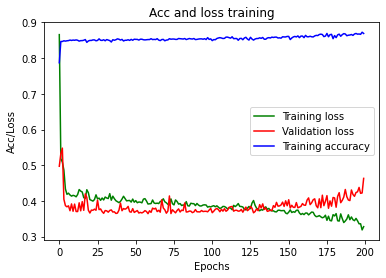

In [ ]:
# Graph visualization
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['accuracy']


plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'r', label='Validation loss')
plt.plot(acc_train, 'b', label='Training accuracy')
# plt.plot(epochs, acc_train, 'm', label='Validation accuracy')

#Label
plt.title('Acc and loss training')
plt.xlabel('Epochs')
plt.ylabel('Acc/Loss')
plt.legend()
plt.show()

## **Matriks evaluasi**

In [ ]:
# Defining evaluation matrix
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show();

## Mencoba dengan masukan manual

In [ ]:
# Predicting based on trained model
y_predicted = model.predict(X_test)


In [ ]:
# male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose 
# RISK --> [[0, 61, 3, 1, 30, 0, 0, 1, 0, 225, 150, 95, 28.58, 65, 103]]	1
# NO RISK --> 0	48	2.0	1	20.0	0.029615	0	0	0	248.0	131.0	72.0	22.00	84.0	86.000000	0
# NO RISK --> [[0, 46, 3, 1, 23, 0, 0, 0, 0, 285, 130, 84, 23.10, 85, 85]]	0
# RISK --> [[0, 46, 2, 1, 20, 0, 0, 0, 0, 291, 112, 78, 23.38, 80, 89]] 1
# NO RISK --> [[0, 52, 2, 0, 0, 0, 0, 0, 0, 269, 133.5, 83, 21.47, 80, 107]]	0
# RISK --> [[1, 50, 1, 1, 1, 0, 0, 1, 0, 313, 179, 92, 25.97, 66, 86]] 1
# NO RISK --> [[0, 45, 2, 1, 20, 0, 0, 0, 0, 313, 100, 71, 21.68, 79, 78]] 0

user = [[1, 50, 1, 1, 1, 0, 0, 1, 0, 313, 179, 92, 25.97, 66, 86]]
uploaded_model = tf.keras.models.load_model('/content/weights-improvement-01-0.88.hdf5') #Nama model berubah-ubah
prediction_DL = model.predict(user)

#score1 = model.score(X_test, y_test)
print('Prediction score :', prediction_DL[0][0])
if prediction_DL[0][0] >= 0.09:
    pred = "CHD Risk in the Next Ten Years"
else:
    pred = "No Risk CHD in Ten Years"
print('Prediksi :',pred)

Prediction score : 0.39929068
Prediksi : CHD Risk in the Next Ten Years
